## Example with secondary neutrinos

The following is a 1D simulation including secondary neutrinos from photopion production and nuclear decay.
Hadrons and Neutrinos are stored separately using two observers.

**Note: the simulation might take a minute**

In [5]:
from crpropa import *

neutrinos = True
photons = False
electrons = False

cmb = CMB()
ebl = IRB_Gilmore12()

# module setup
m = ModuleList()
m.add(SimplePropagation(10 * kpc, 10 * Mpc))
m.add(Redshift())
m.add(PhotoPionProduction(cmb, photons, neutrinos))
m.add(PhotoPionProduction(ebl, photons, neutrinos))
# m.add(PhotoDisintegration(cmb))  # we are propagating only protons
# m.add(PhotoDisintegration(ebl))
m.add(NuclearDecay(electrons, photons, neutrinos))
m.add(ElectronPairProduction(cmb))
m.add(ElectronPairProduction(ebl))
m.add(MinimumEnergy(1e17 * eV))

# observer for hadrons
obs1 = Observer()
obs1.add(Observer1D())
obs1.add(ObserverNeutrinoVeto())  # we don't want neutrinos here
output1 = TextOutput('out-nucleons.txt', Output.Event1D)
output1.setEnergyScale(eV)
obs1.onDetection(output1)
m.add(obs1)
# observer for neutrinos
obs2 = Observer()
obs2.add(Observer1D())
obs2.add(ObserverNucleusVeto())  # we don't want hadrons here
output2 = TextOutput('out-neutrinos.txt', Output.Event1D)
output2.setEnergyScale(eV)
obs2.onDetection(output2)
m.add(obs2)

# source: protons with power-law spectrum from uniformly distributed sources with redshift z = 0-3
source = Source()
source.add(SourceUniform1D(0, redshift2ComovingDistance(3)))
source.add(SourceRedshift1D())
source.add(SourcePowerLawSpectrum(1e17 * eV, 1e22 * eV, -1))
source.add(SourceParticleType(nucleusId(1, 1)))

# run simulation for 5000 primaries and propagate all secondaries
m.setShowProgress(True)
m.run(source, 5000, True)

output1.close()
output2.close()

### Plotting the neutrino energy distribution

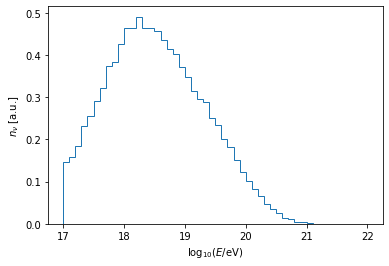

In [10]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt


d = np.genfromtxt('out-neutrinos.txt', names=True)
plt.hist(np.log10(d['E']), bins=np.linspace(17, 22, 51), histtype='step', density=True, stacked=True)
plt.xlabel(r'$\log_{10}(E/{\rm eV})$')
plt.ylabel(r'$n_\nu$ [a.u.]')
plt.show()